# Unveiling Star Wars Trends: Movie Ratings, Viewer Profiles, and Character Favorites

## Table of Contents
- [Introduction](#Introduction)
- [Data Overview](#Data-Overview)
- [Data Cleaning](#Data-Cleaning)
- [Star Wars Movies by Average Ranking](#Star-Wars-Movies-by-Average-Ranking)
- [Star Wars Movies by View Count](#Star-Wars-Movies-by-View-Count)
- [Comparing Star Wars Movie Rankings and View Counts](#Comparing-Star-Wars-Movie-Rankings-and-View-Counts)
  - [Comparison between males and females](#Comparison-between-males-and-females)
  - [Comparison between Star Wars fans and Star Wars non-fans](#Comparison-between-Star-Wars-fans-and-Star-Wars-non-fans)
  - [Comparison between Star Trek fans and Star Trek non-fans](#Comparison-between-Star-Trek-fans-and-Star-Trek-non-fans)
- [Star Wars Movie Preferences by Education Level](#Star-Wars-Movie-Preferences-by-Education-Level)
- [Star Wars Movies View Counts by Location](#Star-Wars-Movies-View-Counts-by-Location)
- [Character Favorability among Respondents](#Character-Favorability-among-Respondents)
- [Conclusion](#Conclusion)

## Introduction

This project explores audience engagement with the Star Wars franchise through a detailed analysis of movie ratings, viewer demographics, and character preferences. The goal is to identify trends and insights related to how different audience segments perceive various movies and characters within the franchise.

To achieve this, I employed a combination of statistical analysis and data visualization techniques. I examined viewership patterns and ratings for each movie, analyzed demographic profiles (including location, gender, and education), and assessed character favorability. This approach allowed me to uncover how different factors influence viewer opinions and movie popularity.

My findings reveal significant patterns in audience preferences, with notable insights into which movies are most favored, which characters are the most liked or disliked, and the characteristics of the most controversial characters. The results provide a nuanced understanding of the Star Wars fanbase and their engagement with the franchise.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

## Data Overview

In [6]:
def explore(df):
    '''
    Function to explore datasets:
    - Display information about the DataFrame
    - Show the first few rows
    - Provide basic statistics
    - Show the null values for each column
    '''
    print('Data Overview:')
    print(df.info())  # Print information about DataFrame including data types and non-null counts
    
    print('\nFirst few rows of the dataset:')
    display(df.head(10))  # Display the first 5 rows to get a sense of the data
    
    print('\nBasic statistics:')
    display(df.describe())  # Show basic statistical details of the numerical columns
    
    print('\nNull values:')
    print(df.isnull().sum())  # Show the null values for each column

explore(star_wars)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the 

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


Basic statistics:


,RespondentID,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,1.186000e+03,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.290128e+09,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.055639e+06,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,3.288373e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.289451e+09,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,3.290147e+09,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,3.290814e+09,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,3.292880e+09,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000



Null values:
RespondentID                                                                                                                                       0
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                  

## Data Cleaning

In [8]:
# Define a mapping dictionary to convert 'Yes'/'No' responses to Boolean values
bool_map_1 = {
    'Yes': True,
    'No': False,
    np.NaN: False
}

# Define a mapping dictionary to convert film titles to Boolean values
# If the title is present, the value is True; if NaN, the value is False
bool_map_2 = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

# List of columns to convert using bool_map_1 ('Yes'/'No' to True/False)
cols_to_convert_to_bool_1 = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?',
    'Do you consider yourself to be a fan of the Star Trek franchise?'
]

# List of columns to convert using bool_map_2 (Film titles/NaN to True/False)
cols_to_convert_to_bool_2 = [
    'Which of the following Star Wars films have you seen? Please select all that apply.',
    'Unnamed: 4',
    'Unnamed: 5',
    'Unnamed: 6',
    'Unnamed: 7',
    'Unnamed: 8'
]

# Convert columns using the corresponding mapping dictionary
for col in cols_to_convert_to_bool_1:
    star_wars[col] = star_wars[col].map(bool_map_1)

for col in cols_to_convert_to_bool_2:
    star_wars[col] = star_wars[col].map(bool_map_2)

# Define a dictionary to rename columns for clarity and easier reference
columns_map = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
    'Have you seen any of the 6 films in the Star Wars franchise?': 'seen_any',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'star_wars_fan',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_I',
    'Unnamed: 10': 'rank_II',
    'Unnamed: 11': 'rank_III',
    'Unnamed: 12': 'rank_IV',
    'Unnamed: 13': 'rank_V',
    'Unnamed: 14': 'rank_VI',
    'Do you consider yourself to be a fan of the Star Trek franchise?': 'star_trek_fan'
}

# Apply the renaming to the dataset
star_wars.rename(columns=columns_map, inplace=True)

# Convert the columns related to film rankings from object to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

## Data Cleaning and Transformation

In the first part of this project, the dataset underwent several cleaning and transformation steps to improve readability and usability:

1. **Mapping 'Yes'/'No' Responses to Boolean Values:**
   - The columns `'Have you seen any of the 6 films in the Star Wars franchise?'` and `'Do you consider yourself to be a fan of the Star Wars film franchise?'` originally contained 'Yes' and 'No' responses. These were mapped to `True` and `False` respectively for easier analysis.

2. **Mapping Film Titles to Boolean Values:**
   - The columns that indicate whether a respondent has seen specific Star Wars films were initially populated with film titles or NaN values. These were converted to `True` (if the film was seen) or `False` (if the entry was NaN), simplifying the analysis of which films have been watched.

3. **Renaming Columns:**
   - Several columns in the dataset had ambiguous or generic names, like `'Unnamed: 4'`, which were renamed to more intuitive names such as `'seen_2'`. This was done to clarify the contents of each column, making the dataset easier to work with.

4. **Converting Ranking Columns to Float:**
   - The columns related to ranking the Star Wars films were converted from their original data type (likely `object`) to `float`. This ensures that the rankings can be analyzed numerically without issues.

These changes were made to streamline further analysis by standardizing the data format and making the dataset's structure more intuitive.

## Star Wars Movies by Average Ranking

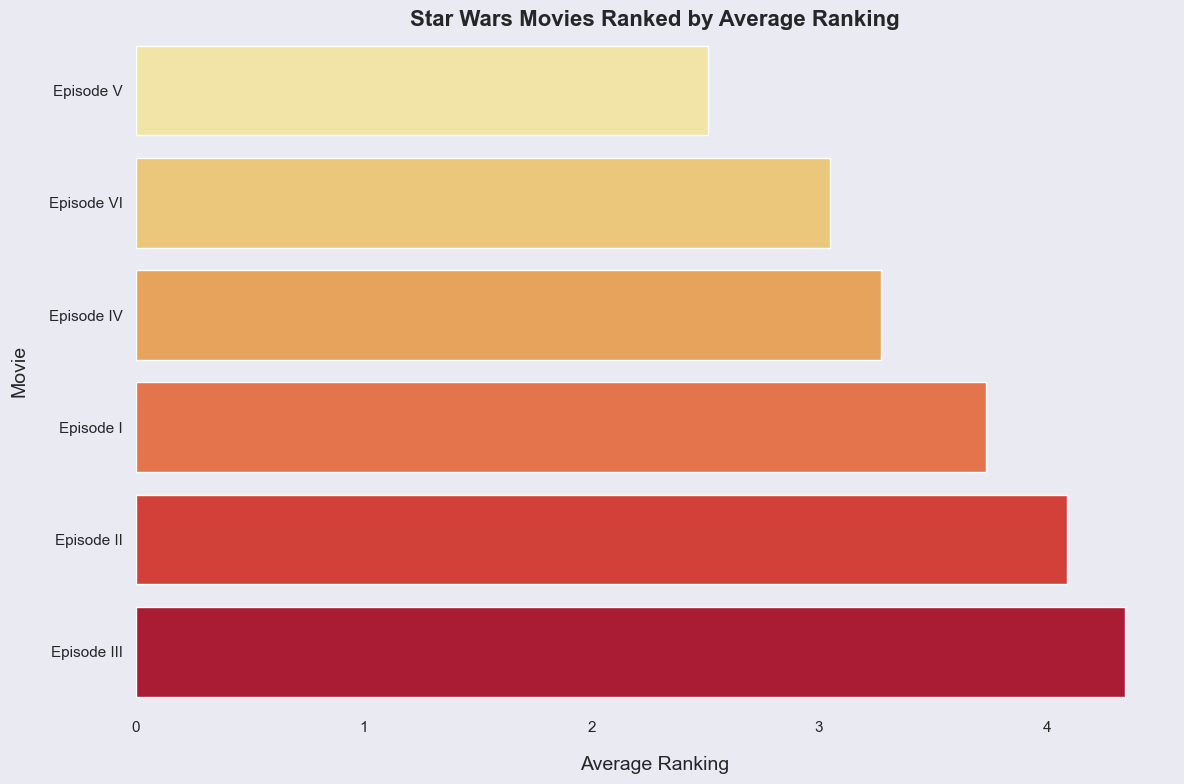

In [11]:
# Calculate the mean ranking for each movie
mean_ratings = star_wars.iloc[:, 9:15].mean()

# Create a DataFrame for easy sorting and plotting
mean_ratings_df = mean_ratings.reset_index()
mean_ratings_df.columns = ['Movie', 'Average Ranking']

# Rename the movies to "Episode I", "Episode II", etc.
mean_ratings_df['Movie'] = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

# Sort the DataFrame by the average rating in ascending order
mean_ratings_df.sort_values('Average Ranking', ascending=True, inplace=True)

# Set a stylistic theme
sns.set_theme(style='dark')

# Create a figure for the bar chart, setting the size and background color
plt.figure(figsize=(12, 8), facecolor='#EAEAF2')

# Plot a horizontal bar chart using Seaborn
sns.barplot(
    data=mean_ratings_df,     # DataFrame containing the mean ratings data
    x='Average Ranking',      # x-axis represents the average ranking
    y='Movie',                # y-axis represents the movies
    hue='Movie',              # add color differentiation based on the movie
    palette='YlOrRd',         # use the 'YlOrRd' color palette for the bars
    legend=False              # hide the legend as it's not necessary for this plot
)

# Add titles and labels
plt.title('Star Wars Movies Ranked by Average Ranking', fontsize=16, weight='bold')
plt.xlabel('Average Ranking', fontsize=14, labelpad=15)
plt.ylabel('Movie', fontsize=14, labelpad=15)

# Remove grid borders
sns.despine(bottom = True, left = True)

# Display the plot
plt.tight_layout()
plt.show()

## Analysis of Star Wars Movies Based on Average Ranking

The horizontal bar chart displays the average rankings for the six Star Wars episodes, revealing how each movie is perceived by the respondents:

- **Episode V: The Empire Strikes Back** holds the highest ranking with an average score of **2.51**, indicating it is the most favored among the six movies.
- **Episode VI: Return of the Jedi** comes in second, with an average ranking of **3.05**.
- **Episode IV: A New Hope** follows closely with an average score of **3.27**.

On the other end of the spectrum:
- **Episode I: The Phantom Menace** has an average ranking of **3.73**, indicating a more mixed reception.
- **Episode II: Attack of the Clones** and **Episode III: Revenge of the Sith** are less favored, with average rankings of **4.09** and **4.34**, respectively.

### Key Insights:
- The original trilogy (Episodes IV, V, VI) is generally more favored compared to the prequel trilogy (Episodes I, II, III).
- **Episode V: The Empire Strikes Back** is the standout favorite, while **Episode III: Revenge of the Sith** is the least favored, as indicated by its higher average ranking score.

These findings provide a clear picture of the relative popularity of each movie within the Star Wars franchise, with a clear preference for the original trilogy.

## Star Wars Movies by View Count

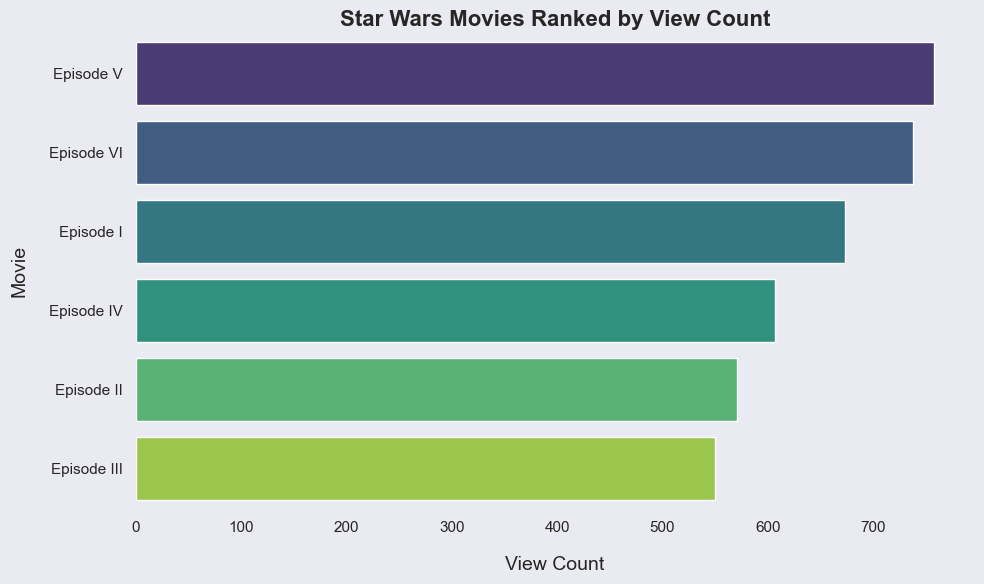

In [14]:
# Sum the viewing counts for each movie
seen_sum = star_wars.iloc[:, 3:9].sum()

# Reset the index to convert the Series to a DataFrame for easier manipulation
seen_sum_df = seen_sum.reset_index()

# Rename the columns for clarity
seen_sum_df.columns = ['Movie', 'View Count']

# Replace the default movie names with more intuitive names
seen_sum_df['Movie'] = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

# Sort the DataFrame by 'View Count' in descending order
seen_sum_df.sort_values('View Count', ascending=False, inplace=True)

# Create a figure for the bar chart, setting the size and background color
plt.figure(figsize=(10, 6), facecolor='#EAEAF2')

# Plot a horizontal bar chart using Seaborn, with color differentiation by movie
sns.barplot(
    x='View Count',           # x-axis represents the view count
    y='Movie',                # y-axis represents the movies
    data=seen_sum_df,         # use the DataFrame containing the sorted data
    hue='Movie',              # add color differentiation based on the movie
    palette='viridis'         # use the 'viridis' color palette for the bars
)

# Set the title of the plot with bold text and increased font size
plt.title('Star Wars Movies Ranked by View Count', weight='bold', fontsize=16)

# Label the x-axis with increased font size and add padding
plt.xlabel('View Count', fontsize=14, labelpad=15)

# Label the y-axis with increased font size and add padding
plt.ylabel('Movie', fontsize=14, labelpad=15)

# Remove the top and right spines for a cleaner look
sns.despine(bottom=True, left=True)

# Automatically adjust the subplot parameters for better layout
plt.tight_layout()

# Display the plot
plt.show()

## Analysis of Star Wars Movies Ranked by View Count

The bar chart visualizing the Star Wars movies by view count reveals the following insights:

1. **Episode V: The Empire Strikes Back** is the most-watched movie, with a total of **758** views. This strong viewership aligns with its high ranking in the franchise, reflecting its popularity and critical acclaim.

2. **Episode VI: Return of the Jedi** follows closely with **738** views. As the conclusion of the original trilogy, it maintains a strong presence among viewers.

3. **Episode I: The Phantom Menace** comes next with **673** views. Despite its mixed reception, it has a significant number of views, likely due to its position as the first episode in the prequel trilogy.

4. **Episode IV: A New Hope**, the original movie that started the franchise, has **607** views. Its slightly lower view count compared to the other original trilogy films may be due to its older release date.

5. **Episode II: Attack of the Clones** and **Episode III: Revenge of the Sith** have the lowest view counts, with **571** and **550** views respectively. These two films, part of the prequel trilogy, generally receive more mixed reviews, which may contribute to their lower viewership.

### Key Insights:
- The original trilogy (Episodes IV, V, VI) continues to dominate in terms of viewership, indicating its lasting appeal.
- The prequel trilogy (Episodes I, II, III) also commands a significant viewership, though it trails behind the original trilogy.
- **Episode V** and **Episode VI** stand out as the most-watched films, further cementing their status as fan favorites within the Star Wars saga.

## Comparing Star Wars Movie Rankings and View Counts

In [17]:
def visualize_star_wars_comparison(group1, group2, label1, label2, title_suffix):
    """
    Visualizes the comparison of view counts and average rankings between two groups.
    
    Parameters:
    group1 (DataFrame): The first group of data.
    group2 (DataFrame): The second group of data.
    label1 (str): Label for the first group.
    label2 (str): Label for the second group.
    title_suffix (str): Suffix for the titles of the plots.
    
    Returns:
    None: Displays the plots.
    """
    
    # Calculate the view counts for each group
    group1_view_count = group1.iloc[:, 3:9].sum()
    group2_view_count = group2.iloc[:, 3:9].sum()

    # Calculate the average rankings for each group
    group1_mean_ranking = group1.iloc[:, 9:15].mean()
    group2_mean_ranking = group2.iloc[:, 9:15].mean()

    # Define movie labels
    movies = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

    # Set the positions and width for the bars
    x = np.arange(len(movies))  # the label locations
    width = 0.35  # the width of the bars

    # Create a figure and axis for view counts with a specified background color
    fig, ax = plt.subplots(2, 1, figsize=(14, 12), facecolor='#EAEAF2', layout='constrained')

    # Add additional space between the two axes
    fig.set_constrained_layout_pads(hspace=0.07)

    # Plot view counts
    ax[0].bar(x - width/2, group1_view_count, width, label=label1)
    ax[0].bar(x + width/2, group2_view_count, width, label=label2)

    # Add labels, title, and legend for the view count chart
    ax[0].set_ylabel('View Count')
    ax[0].set_title(f'Star Wars Movies View Count by {title_suffix}', weight='bold', fontsize=16)
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(movies, weight='bold')
    ax[0].legend(loc='upper right')

    # Plot average rankings
    ax[1].bar(x - width/2, group1_mean_ranking, width, label=label1)
    ax[1].bar(x + width/2, group2_mean_ranking, width, label=label2)

    # Add labels, title, and legend for the ranking chart
    ax[1].set_ylabel('Average Ranking')
    ax[1].set_title(f'Star Wars Movies Average Ranking by {title_suffix}', weight='bold', fontsize=16, pad=10)
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(movies, weight='bold')
    ax[1].legend(loc='upper right')

    # Remove borders (despine)
    sns.despine(bottom=True, left=True)

    # Display the plots
    plt.show()

## Function for Comparing Star Wars Movie Rankings and View Counts

### Overview

I have defined a function named `visualize_star_wars_comparison` that simplifies the process of comparing the view counts and average rankings of Star Wars movies across different groups. This function takes two datasets as inputs (each representing a different group), and it visualizes the comparison using grouped bar charts. 

### Purpose of the Function

The function is designed to eliminate repetitive code and make it easier to conduct comparison analyses between different subgroups within the dataset. Whether we're comparing male vs. female viewers, Star Wars fans vs. non-fans, or even Star Trek fans vs. non-fans, this function allows us to quickly generate the necessary visualizations with minimal code duplication.

### Function Parameters

- **group1 (DataFrame)**: The first subgroup dataset for comparison.
- **group2 (DataFrame)**: The second subgroup dataset for comparison.
- **label1 (str)**: The label for the first group, which will be used in the chart legend.
- **label2 (str)**: The label for the second group, which will be used in the chart legend.
- **title_suffix (str)**: A suffix for the titles of the plots, making them specific to the comparison being made.

### How the Function Works

The function performs the following steps:

1. **Calculate View Counts**: It sums the number of people who have seen each of the six Star Wars movies for both groups.
2. **Calculate Average Rankings**: It computes the average ranking of each movie for both groups.
3. **Generate Bar Charts**: The function then plots two grouped bar charts—one for view counts and another for average rankings—side by side for easy comparison.
4. **Customization**: The plots are customized with labels, titles, and a legend. The background color and spacing between the plots are also adjusted for visual clarity.

### Summary

This function streamlines the comparison process, enabling quick and efficient analysis across various subgroups. It also helps maintain clean, readable, and DRY (Don't Repeat Yourself) code, making the analysis easier to maintain and extend.

## Comparison between males and females

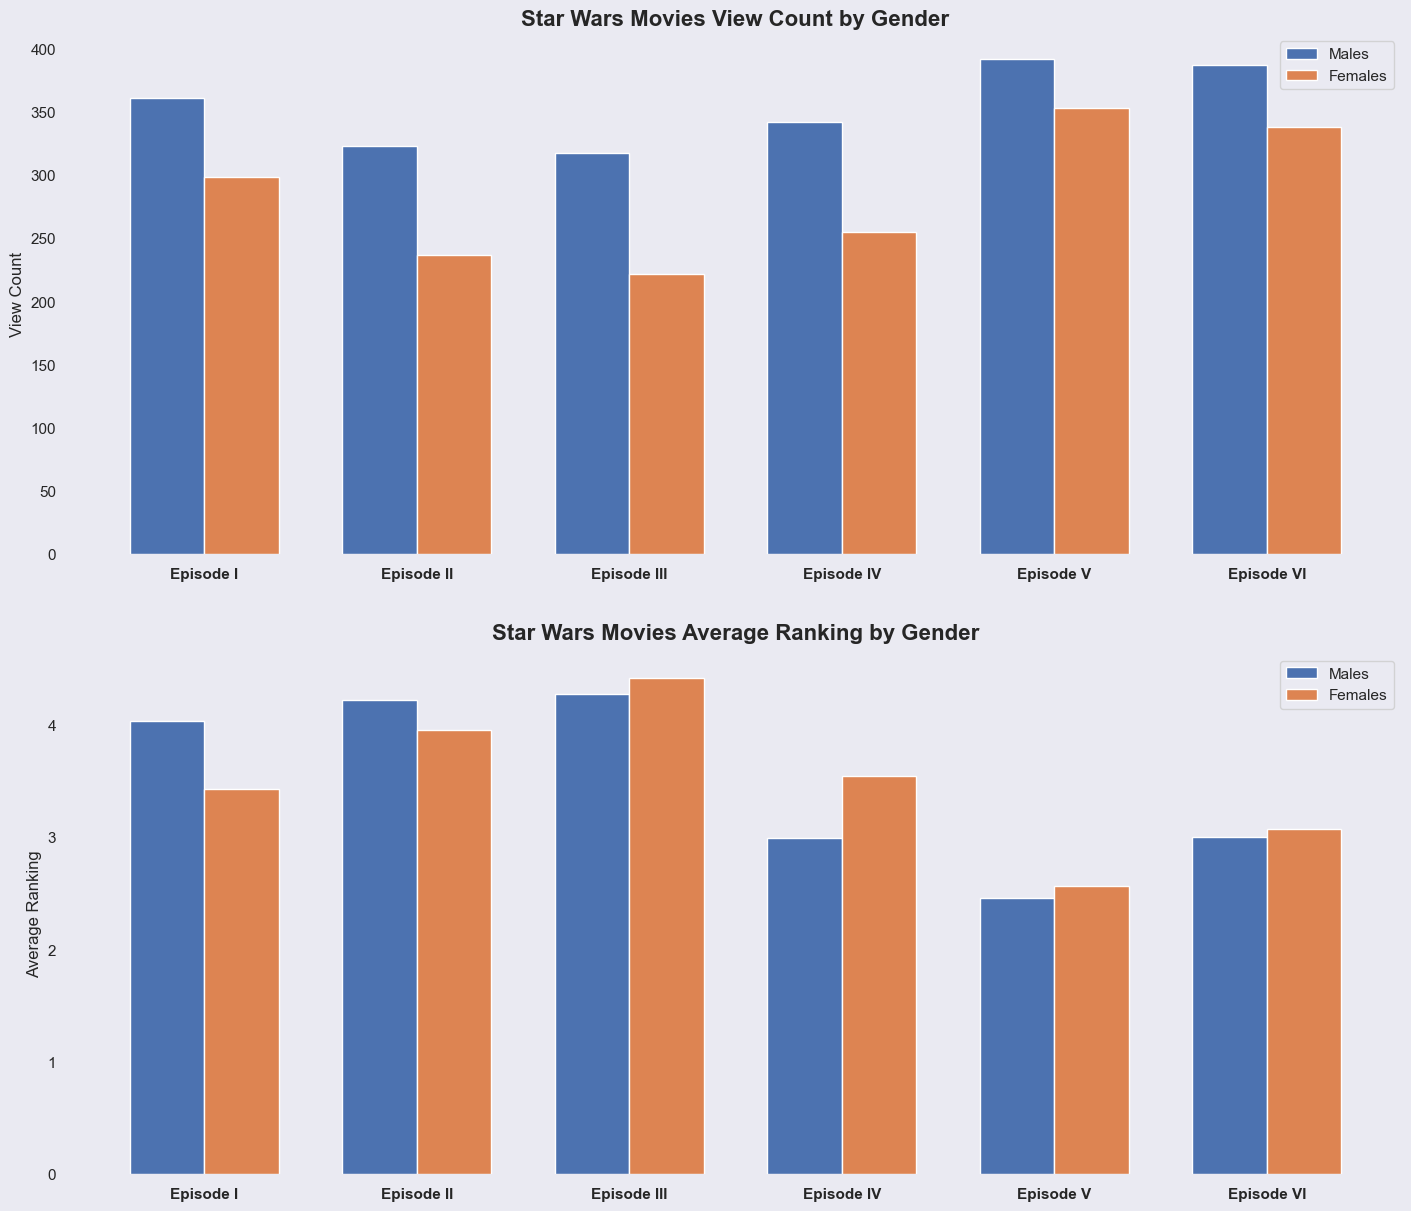

In [20]:
# Comparison between males and females
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

visualize_star_wars_comparison(males, females, 'Males', 'Females', 'Gender')

## Comparison Between Male and Female Viewers of Star Wars Movies

### Overview

I have analyzed the view counts and average rankings of the Star Wars movies separately for male and female viewers. The results provide insights into how each gender perceives the movies, highlighting differences in viewership and preferences.

### View Counts by Gender

The total number of people who have seen each movie is summarized below:

| Movie    | View Count (Male) | View Count (Female) |
|----------|---------------------|----------------------|
| Episode I | 361                 | 298                  |
| Episode II | 323                 | 237                  |
| Episode III | 317                | 222                  |
| Episode IV | 342                 | 255                  |
| Episode V  | 392                 | 353                  |
| Episode VI | 387                 | 338                  |

**Key Observations:**

- **Most Viewed Movies:**
  - *Episode V* is the most viewed movie by both males and females, with 392 male viewers and 353 female viewers.
  - *Episode VI* also shows high viewership with 387 male viewers and 338 female viewers.

- **Least Viewed Movies:**
  - *Episode III* has the lowest viewership among males with 317 viewers and among females with 222 viewers.

- **Gender Differences:**
  - Males generally show higher viewership across most movies compared to females, particularly in *Episode II*, *Episode III*, and *Episode IV*.

### Average Rankings by Gender

The average rankings of each movie are as follows:

| Movie     | Average Ranking (Male) | Average Ranking (Female) |
|-----------|--------------------------|---------------------------|
| Episode I | 4.037825                 | 3.429293                  |
| Episode II | 4.224586                 | 3.954660                  |
| Episode III | 4.274882                | 4.418136                  |
| Episode IV | 2.997636                 | 3.544081                  |
| Episode V  | 2.458629                 | 2.569270                  |
| Episode VI | 3.002364                 | 3.078086                  |

**Key Observations:**

- **Highest Ranked Movies:**
  - *Episode V* receives the highest ranking from both males (2.459) and females (2.569), indicating it is the most favorably rated movie overall.
  - *Episode IV* shows a significant disparity, with males rating it much lower (3.00) compared to females (3.54).

- **Lowest Ranked Movies:**
  - *Episode III* is the lowest ranked movie for males (4.275) and for females (4.418), suggesting it is the least favored by both genders.

- **Gender Differences:**
  - Females generally rate the movies more favorably than males. This is particularly evident with *Episode I* and *Episode II*, where females have significantly lower average rankings.

### Summary

The analysis highlights that while certain movies, like *Episode V*, are popular among both genders, there are noticeable differences in how males and females view and rank the Star Wars movies. Males tend to have higher view counts but lower average rankings compared to females, indicating varied preferences and perceptions of the franchise.

## Comparison between Star Wars fans and Star Wars non-fans

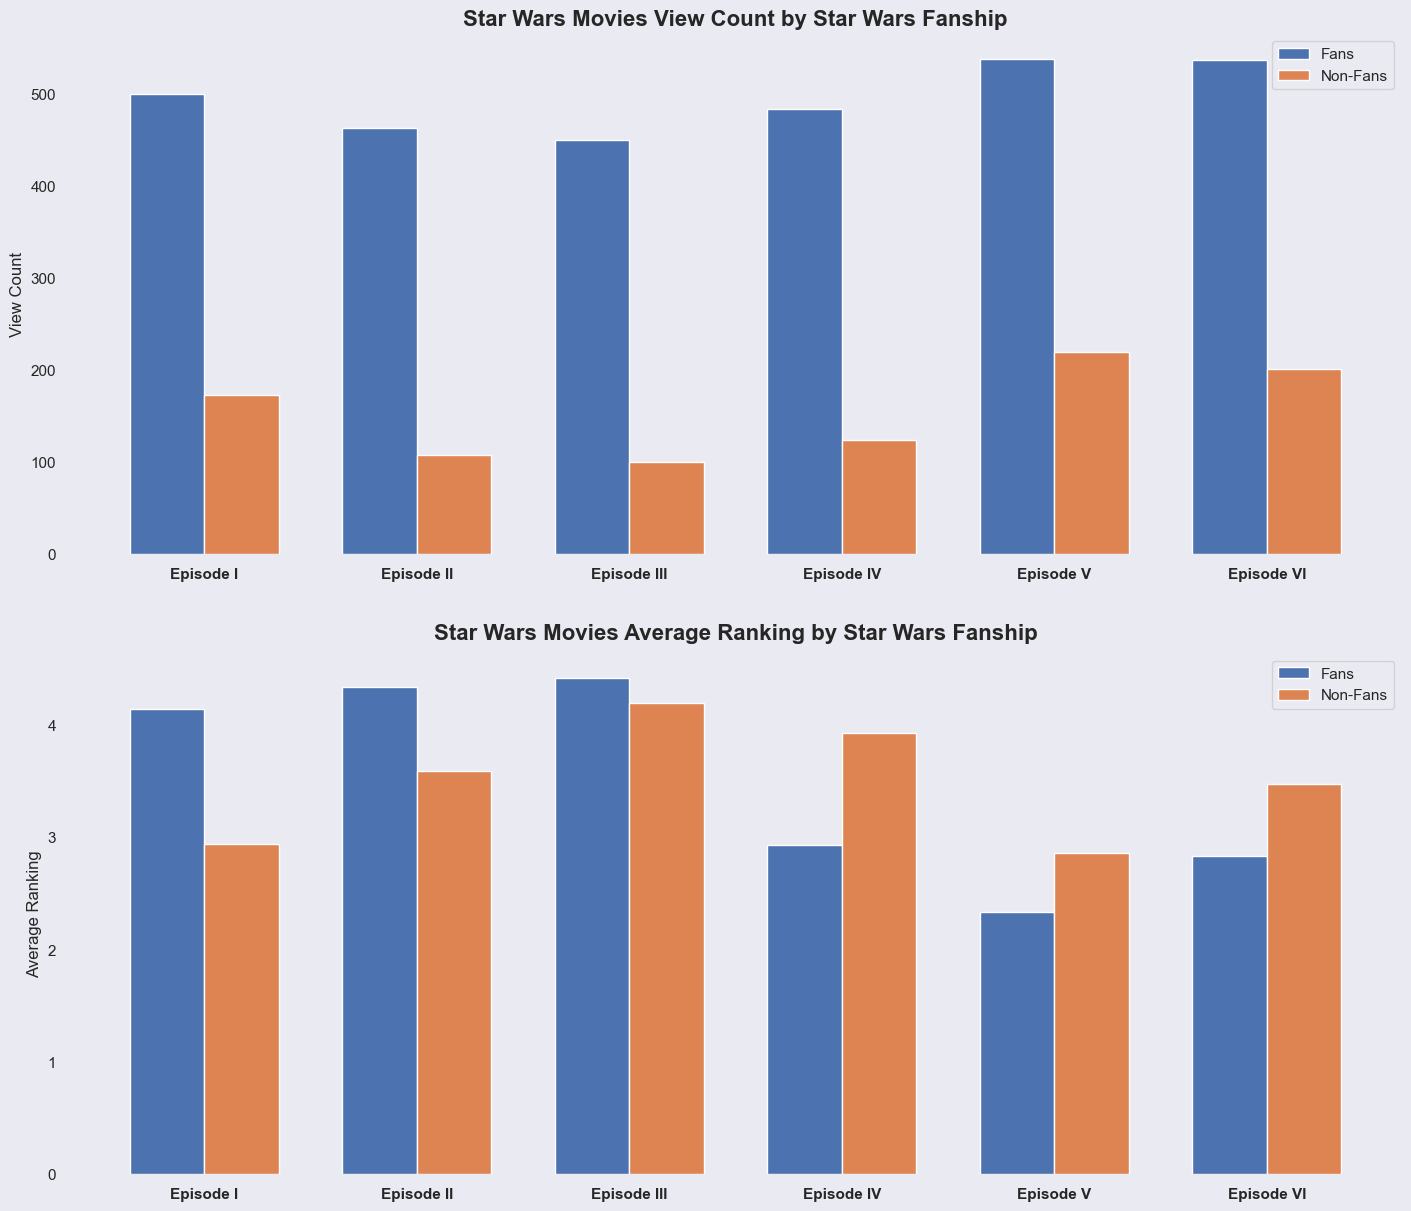

In [23]:
# Comparison between Star Wars fans and Star Wars non-fans
star_wars_fans = star_wars[star_wars['star_wars_fan'] == True]
star_wars_non_fans = star_wars[star_wars['star_wars_fan'] == False]

visualize_star_wars_comparison(star_wars_fans, star_wars_non_fans, 'Fans', 'Non-Fans', 'Star Wars Fanship')

## Analysis: Star Wars Fans vs. Non-Fans

### View Counts by Star Wars Fans and Non-Fans

The table below summarizes the total view counts for each Star Wars episode among fans and non-fans:

| Movie   | View Count (Fans) | View Count (Non-Fans) |
|---------|--------------------|-----------------------|
| Episode I | 500                | 173                   |
| Episode II | 463                | 108                   |
| Episode III | 450               | 100                   |
| Episode IV | 483                | 124                   |
| Episode V | 538                | 220                   |
| Episode VI | 537                | 201                   |

**Observations:**
- **Episode V** and **Episode VI** are the most viewed films among both fans and non-fans, with significant view counts of 538 and 537, respectively, among fans.
- **Episode I** also has a high view count among fans (500), significantly higher than other episodes.
- **Episode II** and **Episode III** have the lowest view counts among fans, and these figures are even lower among non-fans.
- Non-fans have notably lower view counts across all episodes compared to fans, indicating a stronger viewing preference among fans.

### Average Rankings by Star Wars Fans and Non-Fans

The table below provides the average rankings for each episode from the perspective of fans and non-fans:

| Movie    | Average Ranking (Fans) | Average Ranking (Non-Fans) |
|----------|-------------------------|----------------------------|
| Episode I | 4.14                    | 2.94                       |
| Episode II | 4.34                   | 3.59                       |
| Episode III | 4.42                  | 4.19                       |
| Episode IV | 2.93                   | 3.93                       |
| Episode V | 2.33                    | 2.86                       |
| Episode VI | 2.83                   | 3.47                       |

**Observations:**
- **Episode I** and **Episode II** are ranked highest by fans, indicating a strong preference for these episodes among Star Wars enthusiasts.
- **Episode III** also has a high ranking among fans but is less favored compared to Episodes I and II.
- **Episode V** and **Episode VI** receive the lowest average rankings from fans, suggesting these episodes are less preferred despite their high view counts.
- Non-fans generally rank the movies lower compared to fans. However, they also show a more balanced ranking, with fewer extremes compared to the fans.

**Conclusion:**
- Star Wars fans generally have a higher view count and more favorable rankings for the movies compared to non-fans.
- The most and least popular episodes vary between fans and non-fans, highlighting differing preferences and engagement levels with the Star Wars franchise.

## Comparison between Star Trek fans and Star Trek non-fans

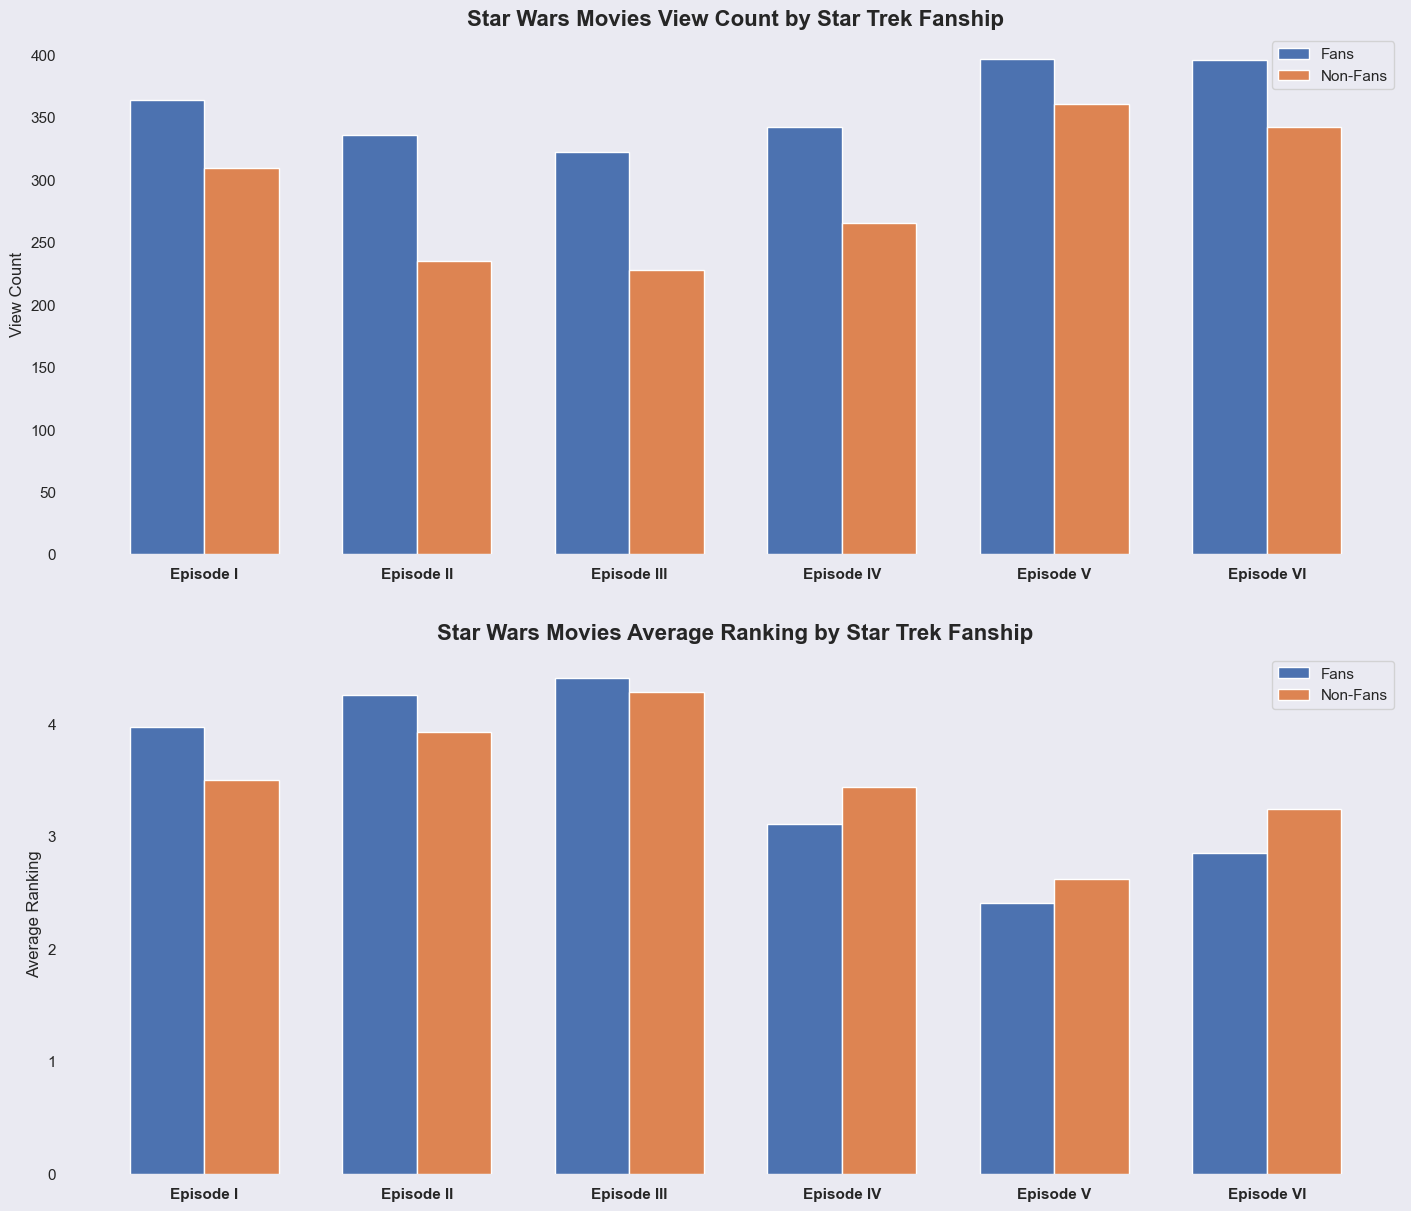

In [26]:
# Comparison between Star Trek fans and Star Trek non-fans
star_trek_fans = star_wars[star_wars['star_trek_fan'] == True]
star_trek_non_fans = star_wars[star_wars['star_trek_fan'] == False]

visualize_star_wars_comparison(star_trek_fans, star_trek_non_fans, 'Fans', 'Non-Fans', 'Star Trek Fanship')

## Comparison Between Star Trek Fans and Non-Fans

### View Counts

The view counts for each Star Wars movie, comparing Star Trek fans and non-fans, reveal interesting patterns:

| Movie       | View Count (Star Trek Fans) | View Count (Non-Fans) |
|-------------|------------------------------|------------------------|
| Episode I   | 364                          | 309                    |
| Episode II  | 336                          | 235                    |
| Episode III | 322                          | 228                    |
| Episode IV  | 342                          | 265                    |
| Episode V   | 397                          | 361                    |
| Episode VI  | 396                          | 342                    |

**Analysis:**
- **Episode V** and **Episode VI** are the most viewed movies among both groups, with Star Trek fans showing a slightly higher view count.
- **Episode I** and **Episode IV** have notably higher view counts among Star Trek fans compared to non-fans.
- **Episode II** and **Episode III** show a smaller difference in view counts between the two groups.

### Average Rankings

The average rankings for each Star Wars movie, segmented by Star Trek fans and non-fans, provide additional insights:

| Movie       | Average Ranking (Star Trek Fans) | Average Ranking (Non-Fans) |
|-------------|---------------------------------|----------------------------|
| Episode I   | 3.969                           | 3.500                      |
| Episode II  | 4.255                           | 3.922                      |
| Episode III | 4.403                           | 4.280                      |
| Episode IV  | 3.111                           | 3.432                      |
| Episode V   | 2.407                           | 2.618                      |
| Episode VI  | 2.851                           | 3.242                      |

**Analysis:**
- **Episode V** and **Episode VI** are the highest ranked by Star Trek fans, reflecting a better preference compared to non-fans.
- **Episode I** and **Episode II** are highly ranked by both groups, but Star Trek fans generally rate these movies higher.
- **Episode III** has a similar ranking for both groups, indicating a consensus on its placement.
- **Episode IV** shows a lower ranking among Star Trek fans compared to non-fans, suggesting less favorable views from fans of the Star Trek franchise.

### Summary

The comparison indicates that Star Trek fans tend to view and rate Star Wars movies more favorably overall. The higher view counts and better average rankings for Star Wars movies among Star Trek fans reflect a stronger preference for the franchise. This trend is particularly noticeable for **Episode V** and **Episode VI**, which are consistently rated higher by Star Trek fans.

## Star Wars Movie Preferences by Education Level

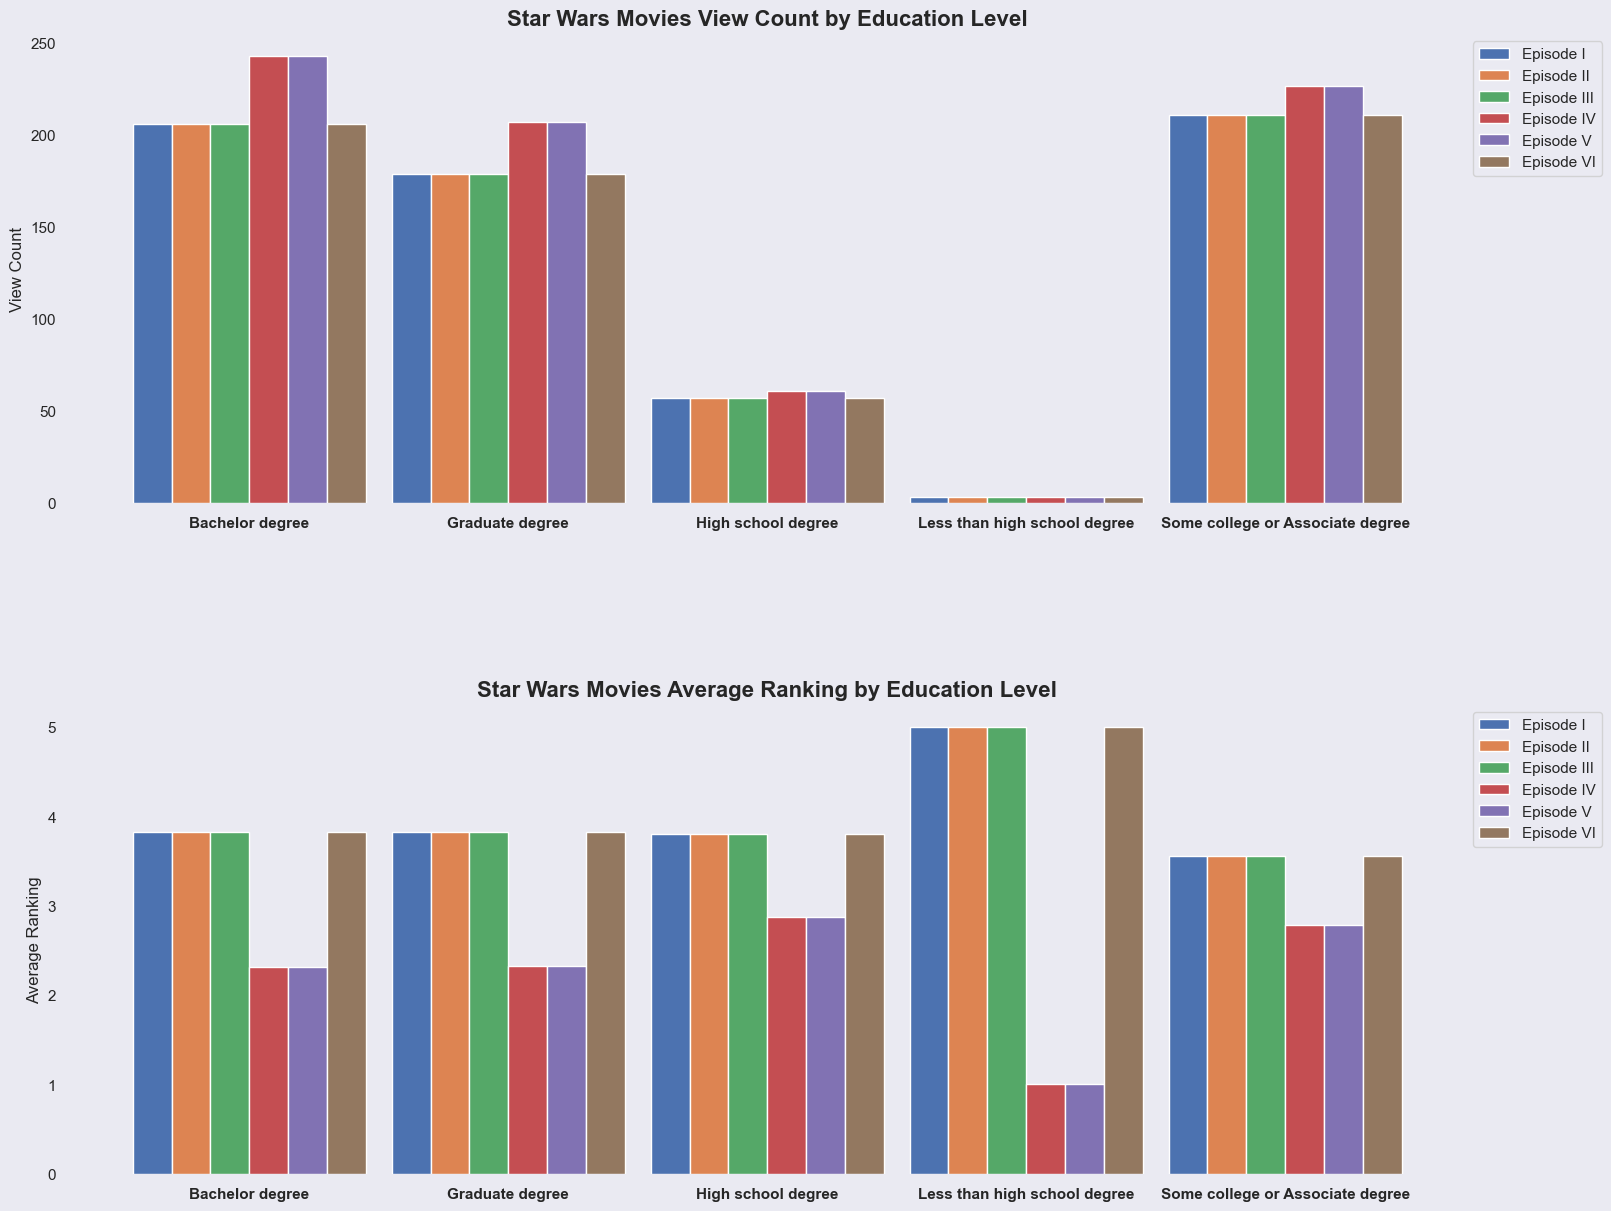

In [29]:
# Define a function to calculate view counts and average rankings
def compare_by_education(df):
    # Ensure that Education column does not have NaN values for analysis
    df_clean = df.dropna(subset=['Education'])

    # Group by Education and calculate total view counts and average rankings
    education_groups = df_clean.groupby('Education').agg({
        'seen_1': 'sum',
        'seen_2': 'sum',
        'seen_3': 'sum',
        'seen_4': 'sum',
        'seen_5': 'sum',
        'seen_6': 'sum',
        'rank_I': 'mean',
        'rank_II': 'mean',
        'rank_III': 'mean',
        'rank_IV': 'mean',
        'rank_V': 'mean',
        'rank_VI': 'mean'
    }).reset_index()
    
    # Rename columns for clarity
    education_groups.columns = [
        'Education', 'View Count I', 'View Count II', 'View Count III', 
        'View Count IV', 'View Count V', 'View Count VI',
        'Average Ranking I', 'Average Ranking II', 'Average Ranking III', 
        'Average Ranking IV', 'Average Ranking V', 'Average Ranking VI'
    ]

    # Define movies and rankings
    movies = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
    num_movies = len(movies)
    
    # Set positions and width for bars
    x = np.arange(len(education_groups['Education']))
    width = 0.15  # Adjusted width to avoid overlap

    # Create subplots
    fig, ax = plt.subplots(2, 1, figsize=(16, 12), facecolor='#EAEAF2', layout='constrained')
    fig.set_constrained_layout_pads(hspace=0.25)

    # Plot View Counts
    for i, movie in enumerate(movies):
        view_counts_column = f'View Count {movie[-1]}'
        if view_counts_column in education_groups.columns:
            ax[0].bar(x + i * width, education_groups[view_counts_column], width, label=movie)

    # Add labels, title, and legend for view count chart
    ax[0].set_ylabel('View Count')
    ax[0].set_title('Star Wars Movies View Count by Education Level', weight='bold', fontsize=16)
    ax[0].set_xticks(x + width * (num_movies / 2 - 0.5))
    ax[0].set_xticklabels(education_groups['Education'], weight='bold')
    ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Plot Average Rankings
    for i, movie in enumerate(movies):
        avg_rankings_column = f'Average Ranking {movie[-1]}'
        if avg_rankings_column in education_groups.columns:
            ax[1].bar(x + i * width, education_groups[avg_rankings_column], width, label=movie)

    # Add labels, title, and legend for ranking chart
    ax[1].set_ylabel('Average Ranking')
    ax[1].set_title('Star Wars Movies Average Ranking by Education Level', weight='bold', fontsize=16)
    ax[1].set_xticks(x + width * (num_movies / 2 - 0.5))
    ax[1].set_xticklabels(education_groups['Education'], weight='bold')
    ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Remove borders (despine)
    sns.despine(bottom=True, left=True)

    # Display the plots
    plt.show()

# Call the function with the dataset
compare_by_education(star_wars)

## Analysis of Star Wars Movie Preferences by Education Level

### View Counts by Education Level

The view counts for each Star Wars episode vary significantly across different education levels. Here is a summary of the total view counts for each episode by education level:

- **Bachelor Degree**: This group shows the highest view counts for most episodes, with particularly high numbers for *Episode V* (243 views) and *Episode VI* (234 views).
- **Graduate Degree**: The view counts are slightly lower than for Bachelor's degrees but still significant, with the highest being *Episode V* (207 views).
- **High School Degree**: This category has the lowest view counts across all episodes, with a notable peak in *Episode IV* (53 views).
- **Less Than High School Degree**: This group has minimal view counts, with only 3 views for *Episode I* and other episodes.
- **Some College or Associate Degree**: Shows relatively high view counts, particularly for *Episode V* (227 views) and *Episode VI* (223 views).

### Average Rankings by Education Level

The average rankings for each movie provide insight into how different education levels perceive the Star Wars films:

- **Bachelor Degree**: This group ranks episodes with a fairly consistent average ranking, with *Episode V* receiving the lowest average ranking (2.31), indicating a higher preference.
- **Graduate Degree**: Similar to Bachelor's, this group ranks episodes with a consistent average, with *Episode V* again scoring the lowest average ranking (2.32).
- **High School Degree**: Shows a varied ranking with *Episode I* and *Episode II* having the lowest average rankings, suggesting a more positive perception of these episodes.
- **Less Than High School Degree**: This group has an unusually high average ranking for *Episode I* (5.00) and *Episode II* (5.33), indicating less favorable perceptions.
- **Some College or Associate Degree**: This group ranks episodes with relatively lower average rankings for most episodes, with *Episode V* receiving the lowest average ranking (2.78).

### Summary

The analysis reveals notable differences in Star Wars movie preferences across education levels:

- **Popularity**: Higher education levels (Bachelor and Graduate degrees) tend to have higher view counts for most episodes, particularly for *Episode V* and *Episode VI*. 
- **Perception**: The average rankings suggest that individuals with lower education levels have less favorable perceptions of the movies, especially *Episode I* and *Episode II*, whereas those with higher education levels tend to rate the movies more favorably overall.

These insights could be useful for understanding audience engagement and tailoring content to different demographic groups.

## Star Wars Movies View Counts by Location

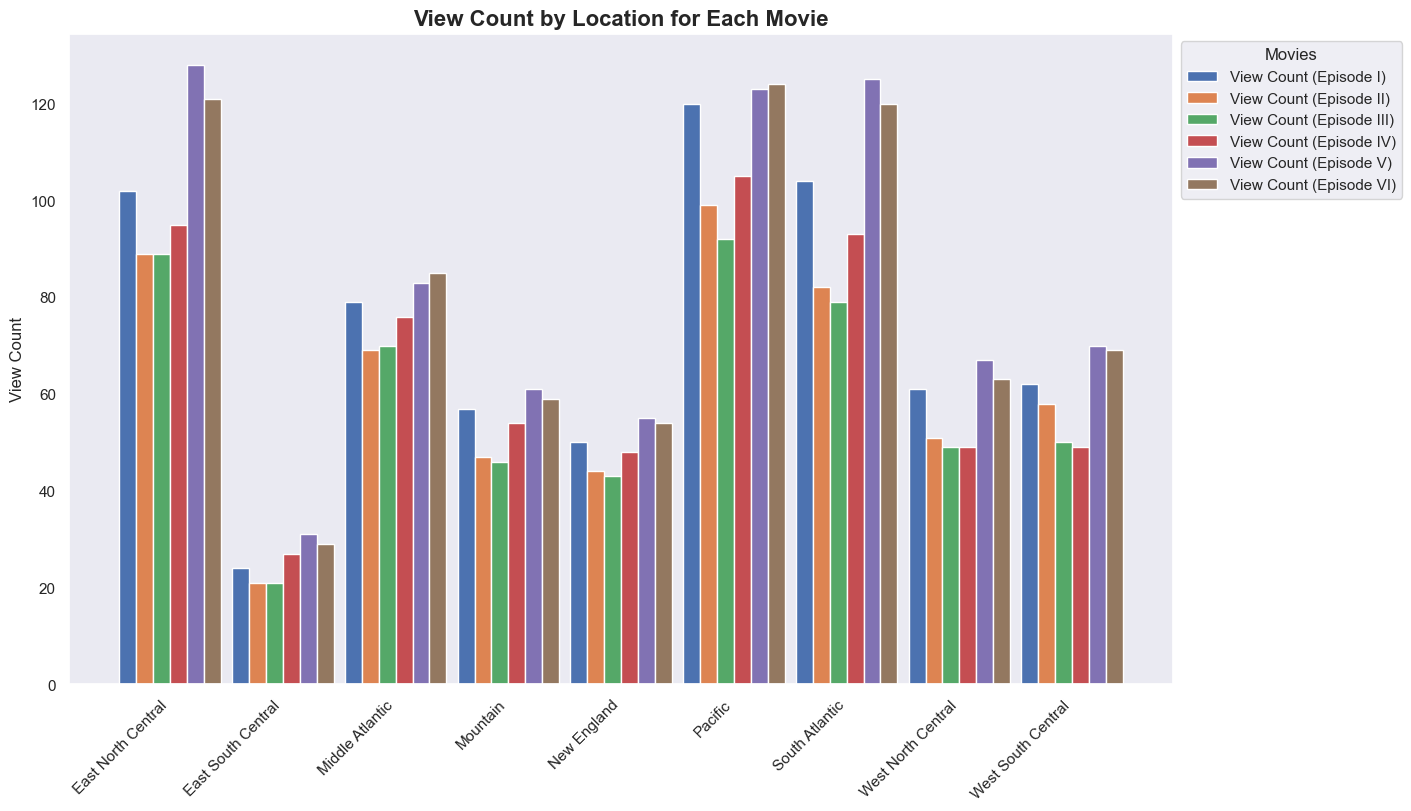

In [32]:
def plot_view_counts_by_location(data_df):
    """
    Generates a grouped bar chart for view counts by location.

    Parameters:
    - data_df (DataFrame): DataFrame containing view counts by location.
    """
    # Extract the location column and view count columns for plotting
    locations = data_df['Location']
    view_count_columns = [col for col in data_df.columns if 'View Count' in col]
    
    num_movies = len(view_count_columns)
    x = np.arange(len(locations))  # the label locations
    width = 0.15  # the width of the bars
    
    # Create figure and axis for the chart
    fig, ax = plt.subplots(figsize=(14, 8), layout='constrained')
    
    # Plot view counts
    for i, view_count_col in enumerate(view_count_columns):
        ax.bar(
            x + i * width - (width * (num_movies - 1) / 2),
            data_df[view_count_col],
            width,
            label=view_count_col
        )
    
    # Add labels, title, and legend
    ax.set_ylabel('View Count')
    ax.set_title('View Count by Location for Each Movie', weight='bold', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(locations, rotation=45, ha='right')
    ax.legend(title='Movies', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Display the chart
    plt.show()

# List of movies and view count columns for convenience
movies = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
view_count_columns = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

# Create a DataFrame for aggregated view counts
view_counts = star_wars.groupby('Location (Census Region)')[view_count_columns].sum().reset_index()

# Rename columns for clarity
view_counts.columns = ['Location'] + [f'View Count ({movie})' for movie in movies]

plot_view_counts_by_location(view_counts)

## Analysis of View Counts by Location

The bar chart provides a comparative view of movie view counts across different U.S. census regions. The dataset includes the following locations and their corresponding view counts for each Star Wars episode:

### Summary of View Counts

#### Top Locations for Each Movie:
- **Episode I**:
  - **Pacific**: 120 views
  - **East North Central**: 102 views
  - **South Atlantic**: 104 views

- **Episode II**:
  - **Pacific**: 99 views
  - **East North Central**: 89 views
  - **South Atlantic**: 82 views

- **Episode III**:
  - **Pacific**: 92 views
  - **East North Central**: 89 views
  - **South Atlantic**: 79 views

- **Episode IV**:
  - **Pacific**: 105 views
  - **East North Central**: 95 views
  - **South Atlantic**: 93 views

- **Episode V**:
  - **Pacific**: 123 views
  - **East North Central**: 128 views
  - **South Atlantic**: 125 views

- **Episode VI**:
  - **Pacific**: 124 views
  - **East North Central**: 121 views
  - **South Atlantic**: 120 views

#### Insights:
1. **Pacific Region**: Consistently shows high view counts across all episodes, indicating a strong interest in Star Wars in this region.
2. **East North Central**: Also exhibits high view counts, particularly notable for "Episode V" and "Episode VI."
3. **South Atlantic**: Demonstrates significant engagement with the series, particularly with "Episode V" and "Episode VI."

### Observations:

- The **Pacific** region leads in view counts for several episodes, suggesting it might be the most engaged or populated region for Star Wars fans.
- **East North Central** and **South Atlantic** regions also show notable interest, with high view counts for multiple episodes.
- **East South Central** and **Mountain** regions have the lowest view counts, indicating relatively lower engagement with the Star Wars series.

Overall, the view count distribution indicates varying levels of engagement with Star Wars across different U.S. locations, with some regions showing consistently higher interest across all episodes.

## Character Favorability among Respondents

In [35]:
# Define a dictionary to map column names to character names for better readability
dictionary_character_names_column = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',  # Mapping the description to 'Han Solo'
    'Unnamed: 16': 'Luke Skywalker',  # Column 'Unnamed: 16' represents 'Luke Skywalker'
    'Unnamed: 17': 'Princess Leia Organa',  # Column 'Unnamed: 17' represents 'Princess Leia Organa'
    'Unnamed: 18': 'Anakin Skywalker',  # Column 'Unnamed: 18' represents 'Anakin Skywalker'
    'Unnamed: 19': 'Obi Wan Kenobi',  # Column 'Unnamed: 19' represents 'Obi Wan Kenobi'
    'Unnamed: 20': 'Emperor Palpatine',  # Column 'Unnamed: 20' represents 'Emperor Palpatine'
    'Unnamed: 21': 'Darth Vader',  # Column 'Unnamed: 21' represents 'Darth Vader'
    'Unnamed: 22': 'Lando Calrissian',  # Column 'Unnamed: 22' represents 'Lando Calrissian'
    'Unnamed: 23': 'Boba Fett',  # Column 'Unnamed: 23' represents 'Boba Fett'
    'Unnamed: 24': 'C-3P0',  # Column 'Unnamed: 24' represents 'C-3P0'
    'Unnamed: 25': 'R2 D2',  # Column 'Unnamed: 25' represents 'R2 D2'
    'Unnamed: 26': 'Jar Jar Binks',  # Column 'Unnamed: 26' represents 'Jar Jar Binks'
    'Unnamed: 27': 'Padme Amidala',  # Column 'Unnamed: 27' represents 'Padme Amidala'
    'Unnamed: 28': 'Yoda'  # Column 'Unnamed: 28' represents 'Yoda'
}

# Rename the columns in the 'star_wars' DataFrame using the dictionary for more meaningful names
star_wars = star_wars.rename(columns=dictionary_character_names_column)

# List of columns to clean
character_columns = star_wars.columns[15:29].tolist()

# Apply str.strip() to remove leading and trailing spaces from values in these columns
for col in character_columns:
    star_wars[col] = star_wars[col].astype(str).str.strip()

# Define a function to map values according to your rules
def map_values(value):
    if value == 'Very favorably':
        return 2
    elif value == 'Somewhat favorably':
        return 1
    elif value == 'Very unfavorably':
        return -2
    elif value == 'Somewhat unfavorably':
        return -1
    else:
        return 0

# Apply the function to the specified columns
star_wars.iloc[:, 15:29] = star_wars.iloc[:, 15:29].map(map_values)

## Data Preparation for Character Favorability Analysis

### Column Renaming
I began by renaming the columns of the `star_wars` DataFrame to use more descriptive names for each character. This was achieved using a mapping dictionary where vague or non-descriptive column names were replaced with the actual character names. This renaming improves the readability and manageability of the dataset.

### Data Cleaning
Next, I cleaned the data in columns related to character favorability. Specifically, I removed any leading and trailing spaces from the values in these columns. This step ensured that the values were consistently formatted, which is crucial for accurate data processing and analysis.

### Value Mapping
I then converted text responses into numerical values to facilitate quantitative analysis. I defined a function to map responses such as "Very favorably," "Somewhat favorably," "Very unfavorably," and "Somewhat unfavorably" to corresponding numerical scores (2, 1, -2, -1, respectively). Any other responses were mapped to 0. This transformation allows us to analyze the data in terms of favorability scores.

These steps collectively prepare the data for further analysis, enabling us to assess character favorability and identify trends in respondents' opinions.

In [37]:
# Calculate the average score for each character
average_scores = star_wars[character_columns].mean()

# Calculate the standard deviation for each character
std_devs = star_wars[character_columns].std()

# Find the character respondents like the most (highest average score)
most_liked_character = average_scores.idxmax()
highest_score = average_scores.max()

# Find the character respondents dislike the most (lowest average score)
most_disliked_character = average_scores.idxmin()
lowest_score = average_scores.min()

# Find the most controversial character (highest standard deviation)
most_controversial_character = std_devs.idxmax()
highest_std_dev = std_devs.max()

print("Average scores for each character:")
print(average_scores)

print("\nStandard deviations for each character:")
print(std_devs)

print("\nThe character respondents like the most is:")
print(f"{most_liked_character} with an average score of {highest_score:.2f}")

print("\nThe character respondents dislike the most is:")
print(f"{most_disliked_character} with an average score of {lowest_score:.2f}")

print("\nThe most controversial character is:")
print(f"{most_controversial_character} with a standard deviation of {highest_std_dev:.2f}")

Average scores for each character:
Han Solo                1.147555
Luke Skywalker          1.099494
Princess Leia Organa    1.079258
Anakin Skywalker        0.504216
Obi Wan Kenobi          1.112142
Emperor Palpatine       0.039629
Darth Vader              0.32968
Lando Calrissian        0.360877
Boba Fett                0.20489
C-3P0                   0.961214
R2 D2                    1.08516
Jar Jar Binks          -0.131535
Padme Amidala           0.331366
Yoda                    1.121417
dtype: object

Standard deviations for each character:
Han Solo                0.937353
Luke Skywalker          0.926979
Princess Leia Organa    0.942458
Anakin Skywalker        1.000624
Obi Wan Kenobi          0.959995
Emperor Palpatine       0.983036
Darth Vader             1.292659
Lando Calrissian        0.785708
Boba Fett               0.886472
C-3P0                   0.954764
R2 D2                   0.950416
Jar Jar Binks           1.115855
Padme Amidala           0.880532
Yoda               

## Analysis of Character Favorability

To understand the sentiment of respondents towards various characters, I performed a detailed analysis using the scores provided in the survey. This analysis aimed to answer three key questions:

1. **Which character do respondents like the most?**
2. **Which character do respondents dislike the most?**
3. **Which character is the most controversial (split between likes and dislikes)?**

### Approach

I followed these steps for the analysis:

1. **Calculate Average Scores:** For each character, I computed the average score to determine overall favorability. A higher average score indicates greater likability.

2. **Identify the Most Liked Character:** The character with the highest average score was identified as the most liked.

3. **Identify the Most Disliked Character:** The character with the lowest average score was identified as the most disliked.

4. **Calculate Standard Deviations:** To measure the variability in responses for each character, I computed the standard deviation. A higher standard deviation indicates greater controversy, suggesting a wider range of opinions.

5. **Identify the Most Controversial Character:** The character with the highest standard deviation was deemed the most controversial.

### Findings

- **The Character Respondents Like the Most:**  
  **Han Solo** with an average score of **1.15**. This indicates that respondents generally view Han Solo favorably.

- **The Character Respondents Dislike the Most:**  
  **Jar Jar Binks** with an average score of **-0.13**. This suggests that respondents generally view Jar Jar Binks unfavorably.

- **The Most Controversial Character:**  
  **Darth Vader** with a standard deviation of **1.29**. This high standard deviation indicates that there is significant variability in how respondents view Darth Vader, making him the most controversial character.

These results provide a clear picture of the overall sentiment towards each character and highlight areas of agreement and disagreement among respondents.



## Conclusion

The project aimed to uncover trends in Star Wars fan engagement by analyzing movie ratings, viewer demographics, and character preferences. I approached this by evaluating viewership patterns, demographic factors, and sentiment towards characters, employing statistical and visualization techniques to present clear insights.

My analysis highlighted key findings: specific movies received the highest ratings, certain characters were more favorably viewed, while others sparked significant controversy. These insights offer a detailed understanding of how different segments of the audience interact with and perceive the Star Wars franchise.